## Deliberated Aberration Data
- Experiment conducted on 06/15/17. Full cubes
- With/out Lyot stop and some high-order combination trials

- Our usual friend of the wiki [page](https://en.wikipedia.org/wiki/Zernike_polynomials) of Zernike polynomials and the coefficients


### Contents
1. [Data](#Data-Inspection)
2. [Inspection](#Peak-and-Center)
    - [Common Zernike Models](#Aberrations)
    - [Sinusoidal](#Sinusoidal)
3. [Oversampling](#Defining-"oversampling"-for-PR-purpose)
4. [Windowing](#Windowing)
    - [Applying](#Applying-circular-windows)
    - [Checks](#Checks)
5. [True Images](#True-Images)
    - [Compare with Measured PSFs](#Compare-with-measured-PSFs)
6. [Phase Retrieval](#PR)
    - [Support](#Support)
    - [Setup](#Setup)
    - [Run](#Run)
    - [Results](#Results)

In [102]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
from scipy.ndimage.interpolation import rotate
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [7]:
predir = '../../data/170616/'
wvl    = 1646. # nm, H-band
angle  = 90.+24.4

### <font color="blue">Some notes about data</font>
- Resolved the orientation issue (see sine wave spots)
- The default "rotation angle" is then 114.4 degrees
- Still assuming that -150 nm focus is presumably "free of aberrations"
- ##Keeping the FWHM=4 in the rotated case

#### <font color="magenta">Notes:</font>
- Skipping the "not rotated" trials for the moment
- 
- Reminder: any shifting of the center could manifest itself later as tip/tilt!!!!!!

---
## Data Inspection

### Data 1
> **Log:** Lyot ON; -150 nm rms of focus

In [9]:
data_01_path = predir+'S20170616E0008_spdc.fits'

data_01 = data_manage(path=data_01_path,angle=angle,cube=True)
data_01(wvl/1000.)
data_01_rot = data_01.rot_img(plot=False)

### Data 2
> **Log:** Lyot ON; 0 focus

In [10]:
data_02_path = predir+'S20170616E0009_spdc.fits'

data_02 = data_manage(path=data_02_path,angle=angle,cube=True)
data_02(wvl/1000.)
data_02_rot = data_02.rot_img(plot=False)

### Data 3
> **Log:** Lyot ON; -200 nm rms of focus

In [11]:
data_03_path = predir+'S20170616E0010_spdc.fits'

data_03 = data_manage(path=data_03_path,angle=angle,cube=True)
data_03(wvl/1000.)
data_03_rot = data_03.rot_img(plot=False)

### Data 4
> **Log:** Lyot ON; 150 nm rms of coma

In [12]:
data_04_path = predir+'S20170616E0011_spdc.fits'

data_04 = data_manage(path=data_04_path,angle=angle,cube=True)
data_04(wvl/1000.)
data_04_rot = data_04.rot_img(plot=False)

### Data 5
> **Log:** Lyot OFF; 150 nm rms of coma

In [13]:
data_05_path = predir+'S20170616E0012_spdc.fits'

data_05 = data_manage(path=data_05_path,angle=angle,cube=True)
data_05(wvl/1000.)
data_05_rot = data_05.rot_img(plot=False)

### Data 6
> **Log:** Lyot OFF; 150 nm rms of coma

_Same as #5_

In [14]:
data_06_path = predir+'S20170616E0013_spdc.fits'

data_06 = data_manage(path=data_06_path,angle=angle,cube=True)
data_06(wvl/1000.)
data_06_rot = data_06.rot_img(plot=False)

### Data 7
> **Log:** Lyot OFF; -150 nm rms of focus, 150 nm rms of coma

In [15]:
data_07_path = predir+'S20170616E0014_spdc.fits'

data_07 = data_manage(path=data_07_path,angle=angle,cube=True)
data_07(wvl/1000.)
data_07_rot = data_07.rot_img(plot=False)

### Data 8
> **Log:** Lyot ON; -150 nm rms of focus, 150 nm rms of coma

In [16]:
data_08_path = predir+'S20170616E0015_spdc.fits'

data_08 = data_manage(path=data_08_path,angle=angle,cube=True)
data_08(wvl/1000.)
data_08_rot = data_08.rot_img(plot=False)

### Data 9
> **Log:** Lyot ON; -150 nm rms of focus, 150 nm rms of spherical

In [17]:
data_09_path = predir+'S20170616E0016_spdc.fits'

data_09 = data_manage(path=data_09_path,angle=angle,cube=True)
data_09(wvl/1000.)
data_09_rot = data_09.rot_img(plot=False)

### Data 10
> **Log:** Lyot ON; -150 nm rms of focus, -150 nm rms of spherical

In [18]:
data_10_path = predir+'S20170616E0017_spdc.fits'

data_10 = data_manage(path=data_10_path,angle=angle,cube=True)
data_10(wvl/1000.)
data_10_rot = data_10.rot_img(plot=False)

### Data 11
> **Log:** Lyot OFF; -150 nm rms of focus, -150 nm rms of spherical

In [19]:
data_11_path = predir+'S20170616E0018_spdc.fits'

data_11 = data_manage(path=data_11_path,angle=angle,cube=True)
data_11(wvl/1000.)
data_11_rot = data_11.rot_img(plot=False)

### Data 12
> **Log:** Lyot OFF; -150 nm focus, 100 (5,1), -150 (4,2), -100 (5,5), 50 (3,3)

In [20]:
data_12_path = predir+'S20170616E0019_spdc.fits'

data_12 = data_manage(path=data_12_path,angle=angle,cube=True)
data_12(wvl/1000.)
data_12_rot = data_12.rot_img(plot=False)

### Data 13
> **Log:** Lyot ON; -150 nm focus, 100 (5,1), -150 (4,2), -100 (5,5), 50 (3,3)

In [21]:
data_13_path = predir+'S20170616E0020_spdc.fits'

data_13 = data_manage(path=data_13_path,angle=angle,cube=True)
data_13(wvl/1000.)
data_13_rot = data_13.rot_img(plot=False)

### Data 14
> **Log:** 25 nm rms sine in x

In [22]:
data_14_path = predir+'S20170616E0021_spdc.fits'

data_14 = data_manage(path=data_14_path,angle=angle,cube=True)
data_14(wvl/1000.)
data_14_rot = data_14.rot_img(plot=False)

---
## <font color="blue">Peak and Center</font>
#### Aberrations
_[(Back to top)](#Contents)_

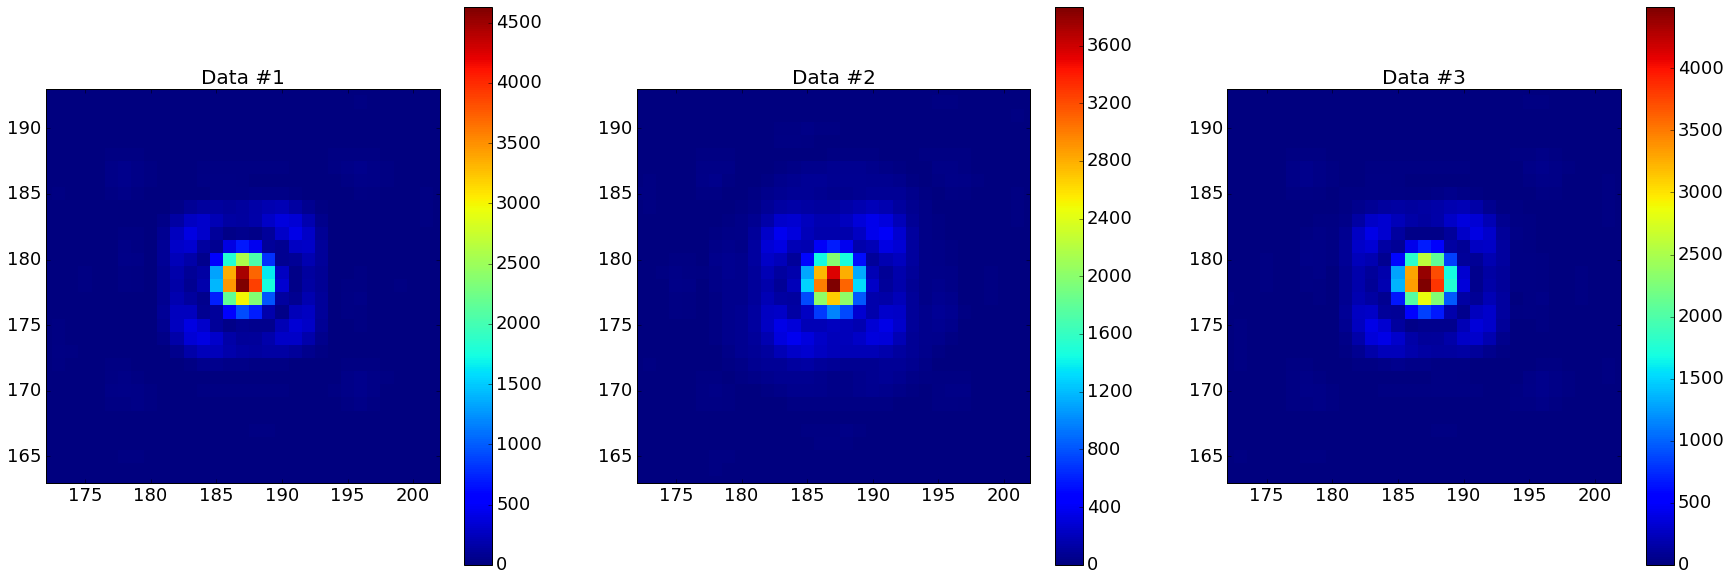

In [30]:
xlim = (172,202)
ylim = (163,193)

##
plt.figure(figsize=(30,10))
plt.subplot(131); plt.title('Data #1')
plt.imshow(data_01_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_01_rot))

plt.subplot(132); plt.title('Data #2')
plt.imshow(data_02_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_02_rot))

plt.subplot(133); plt.title('Data #3')
plt.imshow(data_03_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_03_rot))

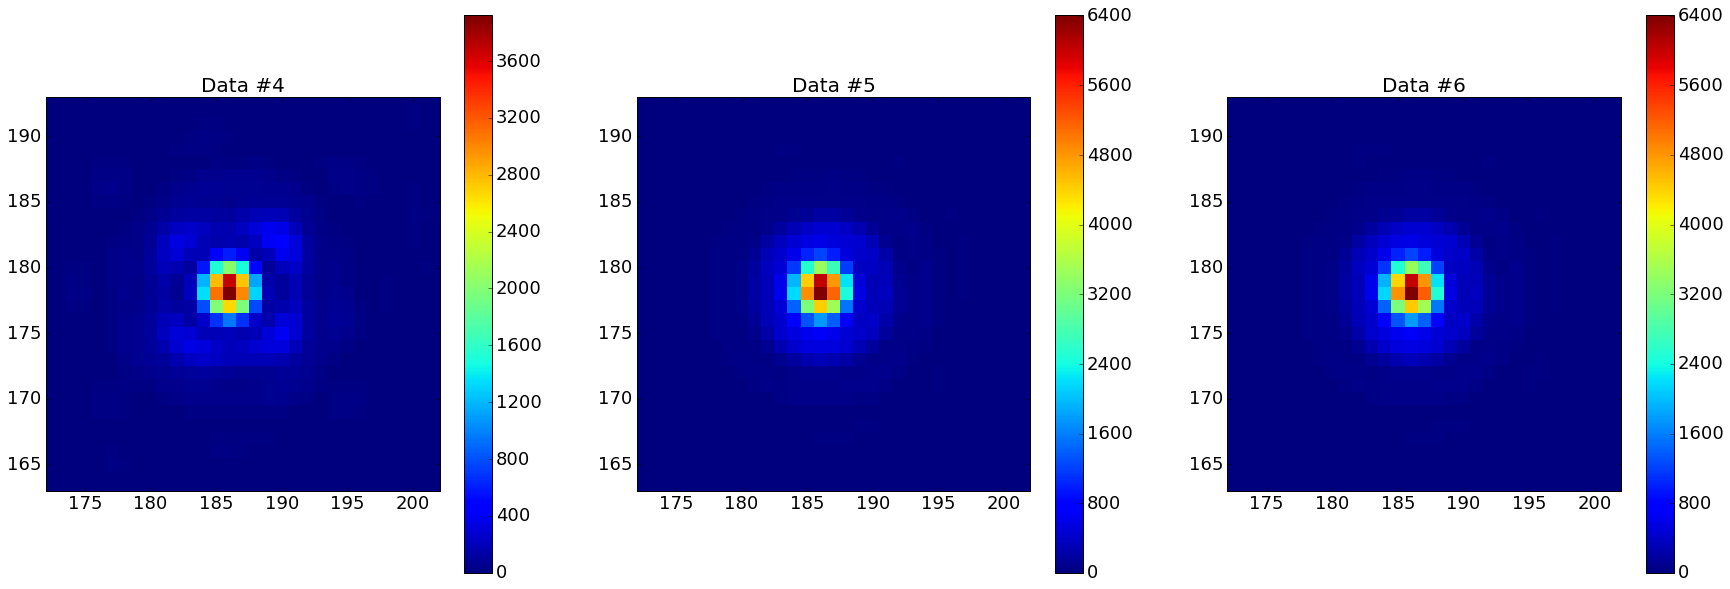

In [31]:
##
plt.figure(figsize=(30,10))
plt.subplot(131); plt.title('Data #4')
plt.imshow(data_04_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_04_rot))

plt.subplot(132); plt.title('Data #5')
plt.imshow(data_05_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_05_rot))

plt.subplot(133); plt.title('Data #6')
plt.imshow(data_06_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_06_rot))

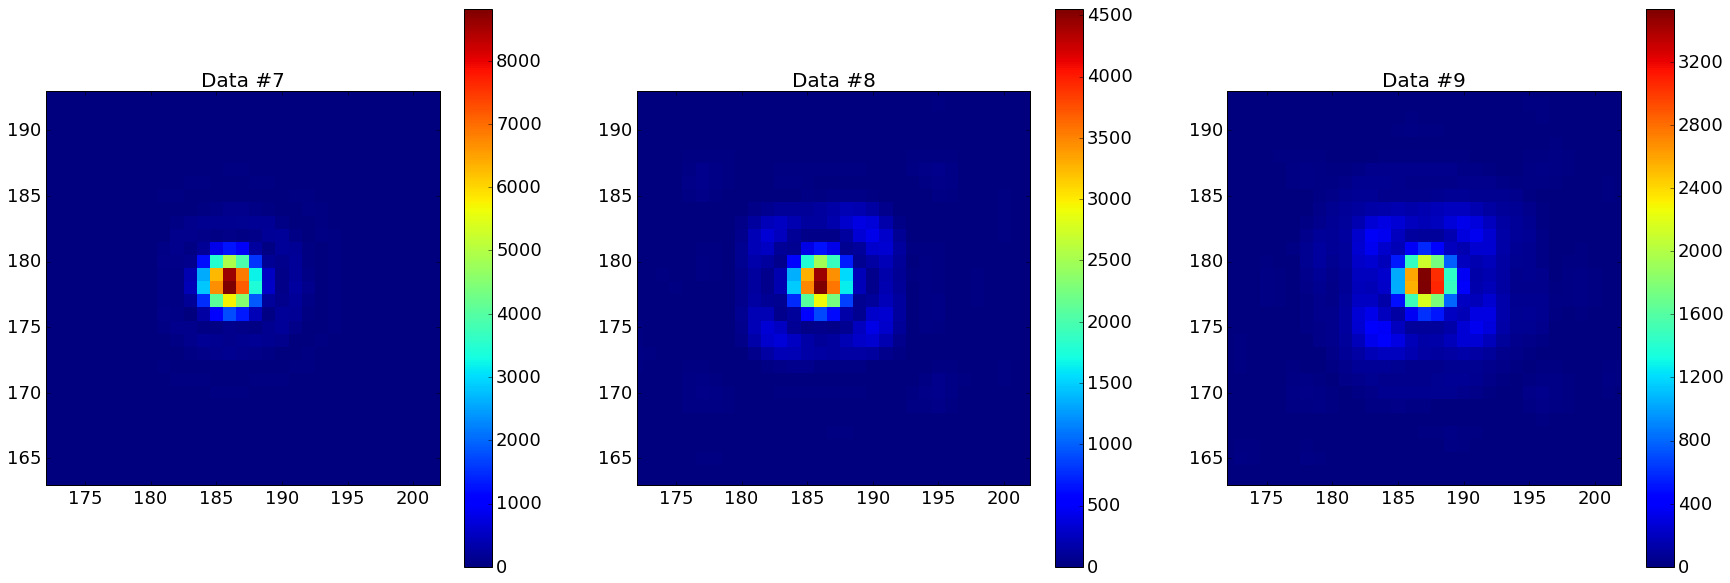

In [32]:
##
plt.figure(figsize=(30,10))
plt.subplot(131); plt.title('Data #7')
plt.imshow(data_07_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_07_rot))

plt.subplot(132); plt.title('Data #8')
plt.imshow(data_08_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_08_rot))

plt.subplot(133); plt.title('Data #9')
plt.imshow(data_09_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_09_rot))

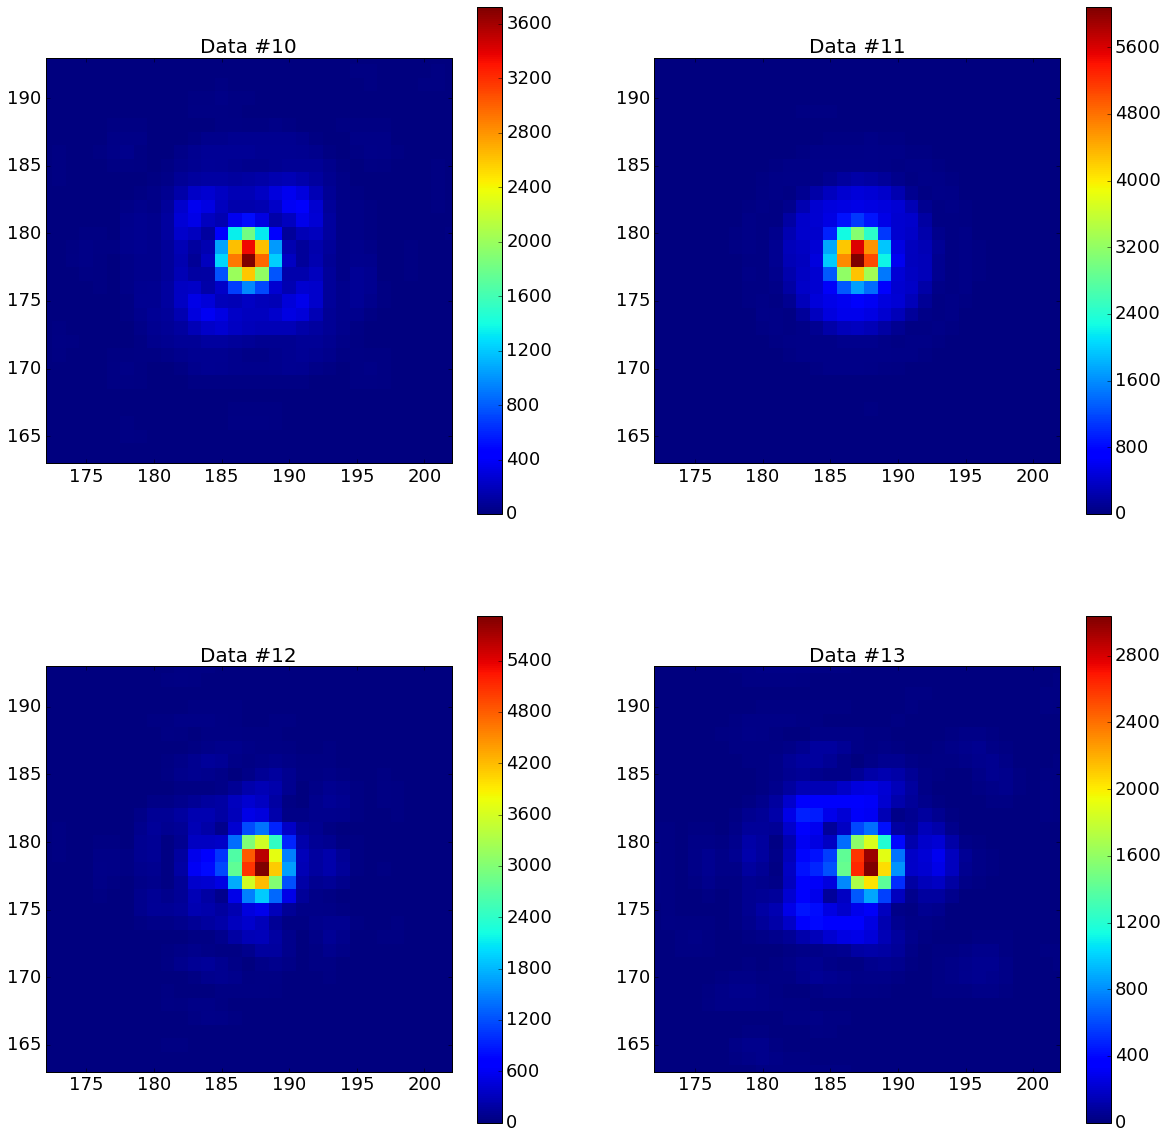

In [33]:
##
plt.figure(figsize=(20,20))
plt.subplot(221); plt.title('Data #10')
plt.imshow(data_10_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_10_rot))

plt.subplot(222); plt.title('Data #11')
plt.imshow(data_11_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_11_rot))

plt.subplot(223); plt.title('Data #12')
plt.imshow(data_12_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_12_rot))

plt.subplot(224); plt.title('Data #13')
plt.imshow(data_13_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(data_13_rot))

#### Sinusoidal 
_[(Back to top)](#Contents)_

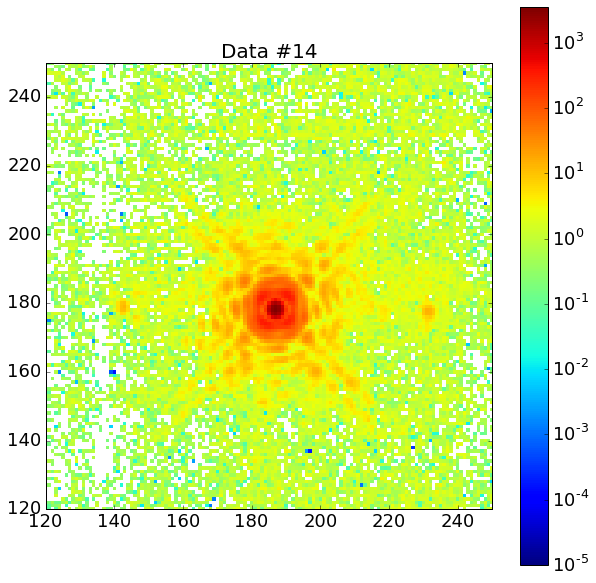

In [36]:
##
xlim3 = (120,250)
ylim3 = (120,250)

##
plt.figure(figsize=(10,10))
plt.title('Data #14')
plt.imshow(data_14_rot,origin='lower',interpolation='none',norm=LogNorm())
plt.xlim(xlim3); plt.ylim(ylim3); 
plt.colorbar(); plt.clim(1e-5,np.max(data_14_rot))

The two "spots", being the positive and negative Fourier peaks, are now aligned with the x-axis as setup

Center coordinates of (187,178) look good for all images.

---
## Defining "oversampling" for PR purpose
** *See the original [notebook](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/othernotebooks/data_handling.ipynb)* **

Unfortunately in the experiments we forgot to take "-150 nm focus without Lyot stop", the exact size of FWHM is hence undetermined. Nevertheless, we shall still assume the same as [before](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/othernotebooks/data_handling2.ipynb#Defining-"oversampling"-for-PR-purpose).

_[(Back to top)](#Contents)_

---
## <font color="blue">Windowing</font>
Circular windowing. But need different sizes for the Zernike combinations and the sinusoidals (larger)

### Applying circular windows
#### Applying to Zernike mode combinations
## <font color="orange">try smaller window on simpler cases</font>

In [122]:
Npix = 512
size1 = 20 
size2 = 30

ctx,cty = 187,178

##
data_01_clp = clipping(data_01_rot,Npix=Npix,center=(ctx,cty),size=size1)
data_02_clp = clipping(data_02_rot,Npix=Npix,center=(ctx,cty),size=size1)
data_03_clp = clipping(data_03_rot,Npix=Npix,center=(ctx,cty),size=size1)
data_04_clp = clipping(data_04_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_05_clp = clipping(data_05_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_06_clp = clipping(data_06_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_07_clp = clipping(data_07_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_08_clp = clipping(data_08_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_09_clp = clipping(data_09_rot,Npix=Npix,center=(ctx,cty),size=size1)
data_10_clp = clipping(data_10_rot,Npix=Npix,center=(ctx,cty),size=size1)
data_11_clp = clipping(data_11_rot,Npix=Npix,center=(ctx,cty),size=size1)
data_12_clp = clipping(data_12_rot,Npix=Npix,center=(ctx,cty),size=size2)
data_13_clp = clipping(data_13_rot,Npix=Npix,center=(ctx,cty),size=size2)

_[(Back to top)](#Contents)_

### Checks
#### Modes

(220, 290)

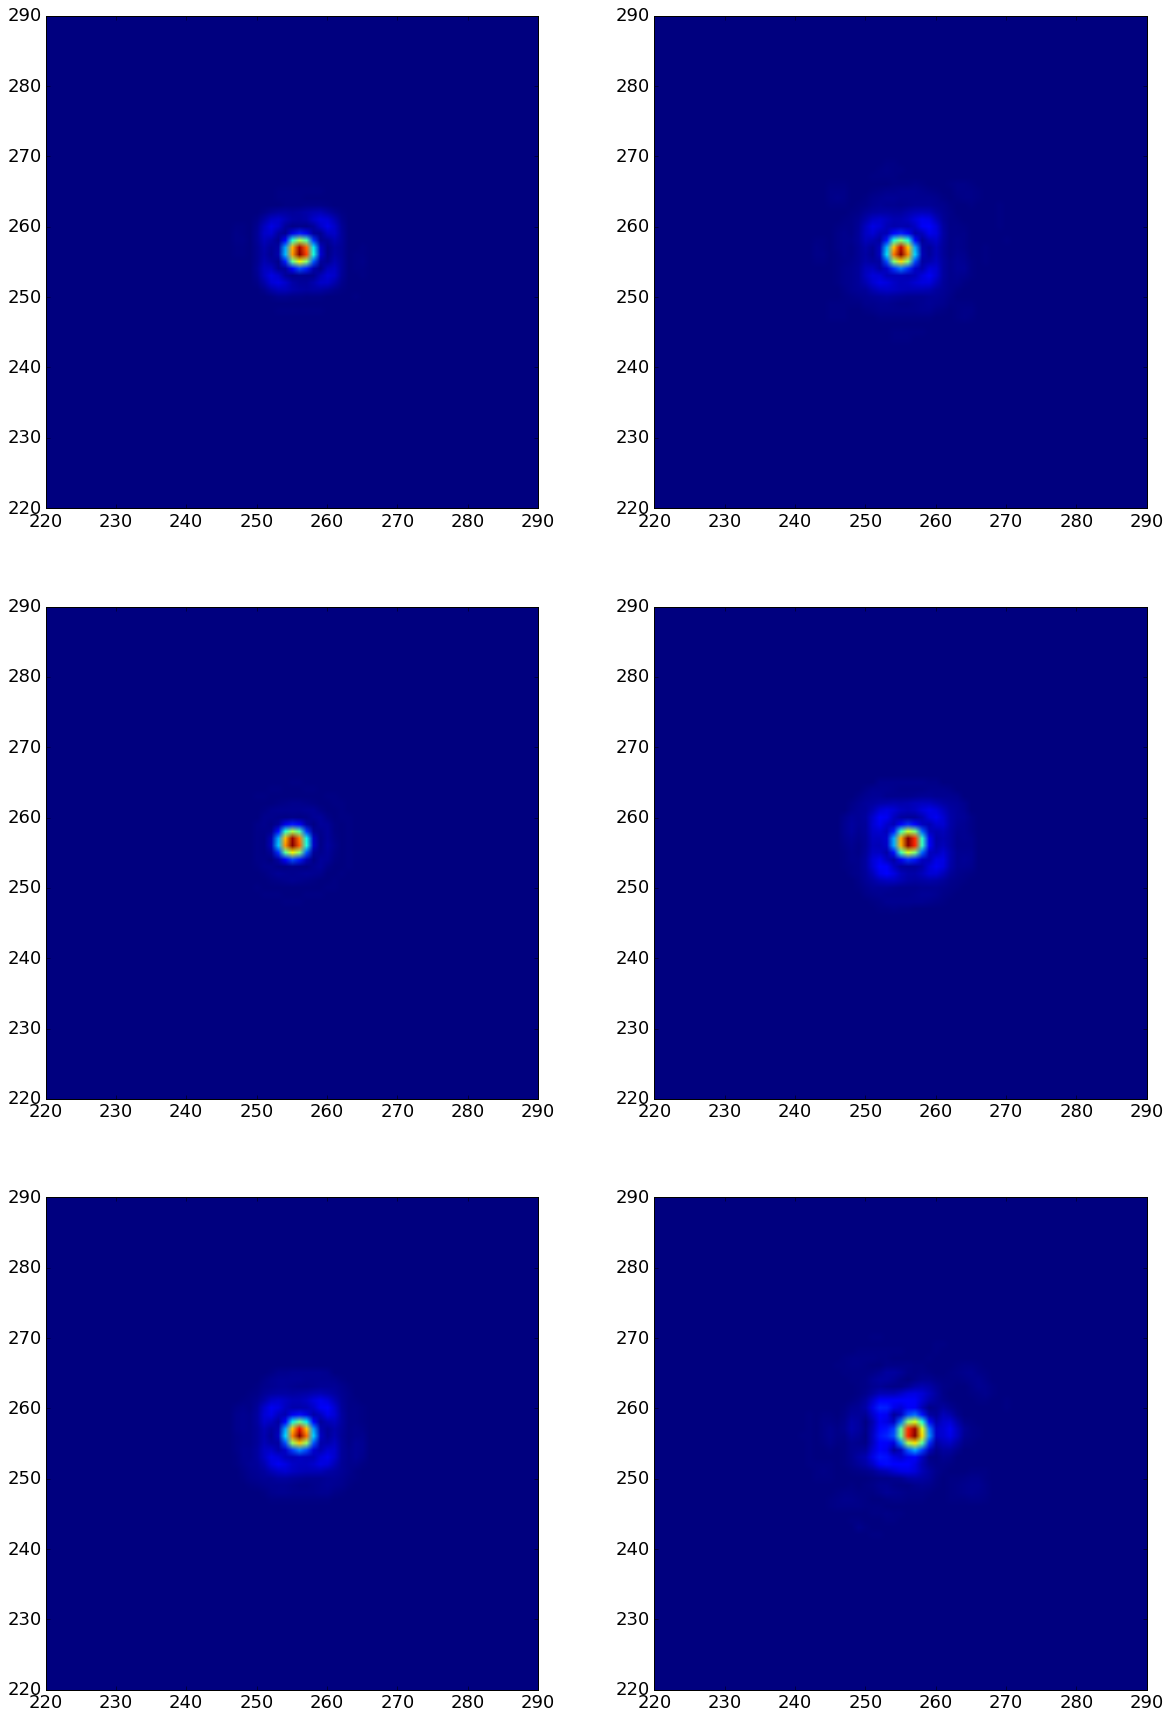

In [123]:
plt.figure(figsize=(20,30))
plt.subplot(321); plt.imshow(data_01_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(322); plt.imshow(data_04_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(323); plt.imshow(data_07_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(324); plt.imshow(data_09_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(325); plt.imshow(data_10_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)
plt.subplot(326); plt.imshow(data_13_clp,origin='lower'); plt.xlim(220,290); plt.ylim(220,290)


_[(Back to top)](#Contents)_

---
## True Images

In [39]:
## convert rms aberration to phase angle
conf = lambda x: x/wvl * 2*np.pi

### Generate true images
**Note:** The Lyot stop is not incorporated here

In [112]:
%%capture
os  = 1.665
os2 = 1.66
Npix = 154
c1 = [0.]*35

## data 01
d01_c2 = [0.]*35
d01_P,d01_P_,d01_F,d01_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d01_c2,oversamp=os)
## data 02
d02_c2 = [0.,0.,0.,conf(150.)]+[0.]*31
d02_P,d02_P_,d02_F,d02_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d02_c2,oversamp=os)
## data 03
d03_c2 = [0.,0.,0.,conf(-50.)]+[0.]*31
d03_P,d03_P_,d03_F,d03_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d03_c2,oversamp=os)
## data 04
d04_c2 = [0.,0.,0.,conf(-150.),0.,0.,0.,conf(150.)]+[0.]*27
d04_P,d04_P_,d04_F,d04_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d04_c2,oversamp=os)
## data 05
d05_c2 = [0.,0.,0.,conf(-150.),0.,0.,0.,conf(150.)]+[0.]*27
d05_P,d05_P_,d05_F,d05_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d05_c2,oversamp=os)
## data 06
d06_c2 = [0.,0.,0.,conf(-150.),0.,0.,0.,conf(150.)]+[0.]*27
d06_P,d06_P_,d06_F,d06_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d06_c2,oversamp=os)
## data 07
d07_c2 = [0.,0.,0.,0.,0.,0.,0.,conf(150.)]+[0.]*27
d07_P,d07_P_,d07_F,d07_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d07_c2,oversamp=os,max_aberP=.05)
## data 08
d08_c2 = [0.,0.,0.,0.,0.,0.,0.,conf(150.)]+[0.]*27
d08_P,d08_P_,d08_F,d08_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d08_c2,oversamp=os)
## data 09
d09_c2 = [0.]*10+[conf(150.)]+[0.]*24
d09_P,d09_P_,d09_F,d09_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d09_c2,oversamp=os)
## data 10
d10_c2 = [0.]*10+[conf(-150.)]+[0.]*24
d10_P,d10_P_,d10_F,d10_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d10_c2,oversamp=os)
## data 11
d11_c2 = [0.]*10+[conf(-150.)]+[0.]*24
d11_P,d11_P_,d11_F,d11_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d11_c2,oversamp=os)
## data 12
d12_c2 = [0.,0.,0.,0.,0.] + \
         [0.,0.,0.,0.,conf(50.)] + \
         [0., conf(-150.), 0.,0.,0.] + \
         [conf(100.),0.,0.,0., conf(-100.)] + [0.]*15
d12_P,d12_P_,d12_F,d12_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d12_c2,oversamp=os)
## data 13
d13_c2 = [0.,0.,0.,0.,0.] + \
         [0.,0.,0.,0.,conf(50.)] + \
         [0., conf(-150.), 0.,0.,0.] + \
         [conf(100.),0.,0.,0., conf(-100.)] + [0.]*15
d13_P,d13_P_,d13_F,d13_F_ = true_imgs(Npix=Npix,coeff1=c1,coeff2=d13_c2,oversamp=os)

_([Back to top](#Contents))_

### Compare with measured PSFs

(240, 270)

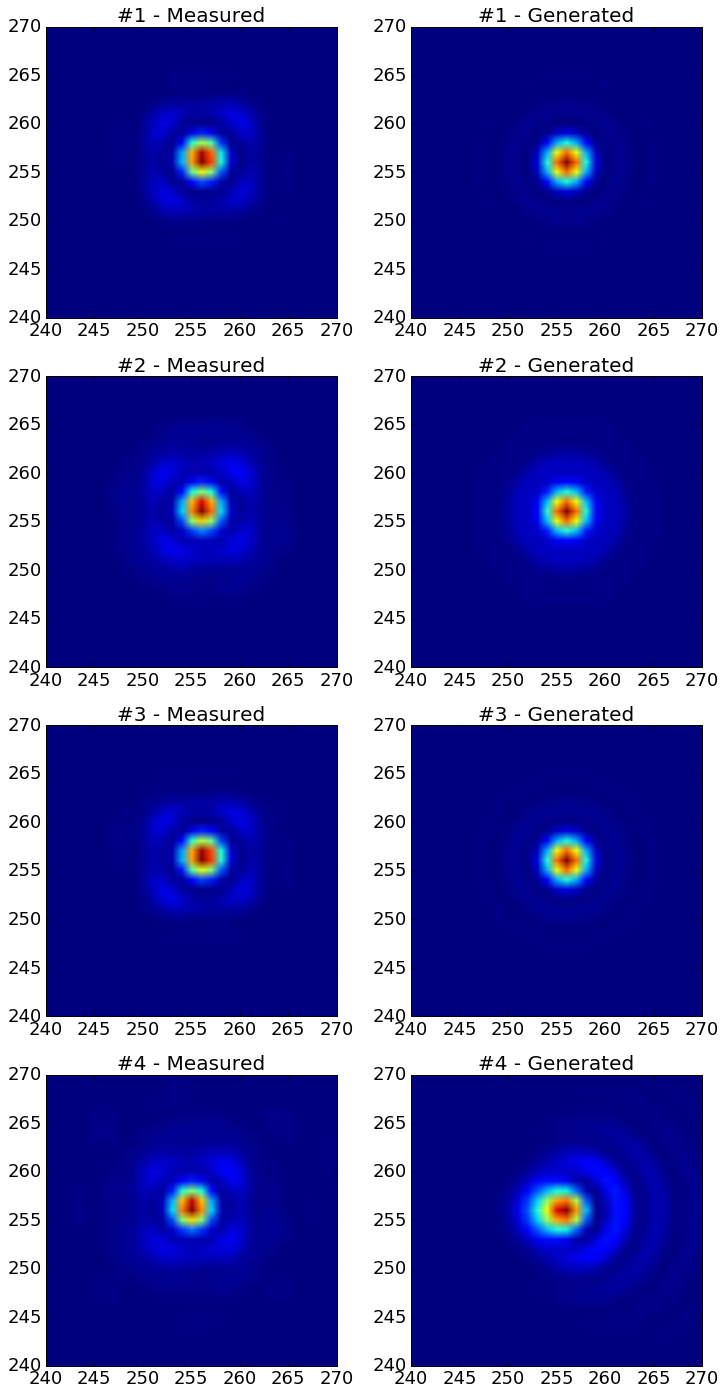

In [124]:
plt.figure(figsize=(12,24))
plt.subplot(421); plt.imshow(data_01_clp,origin='lower'); plt.title('#1 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(422); plt.imshow(d01_F,origin='lower'); plt.title('#1 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(423); plt.imshow(data_02_clp,origin='lower'); plt.title('#2 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(424); plt.imshow(d02_F,origin='lower'); plt.title('#2 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(425); plt.imshow(data_03_clp,origin='lower'); plt.title('#3 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(426); plt.imshow(d03_F,origin='lower'); plt.title('#3 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(427); plt.imshow(data_04_clp,origin='lower'); plt.title('#4 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(428); plt.imshow(d04_F,origin='lower'); plt.title('#4 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

(240, 270)

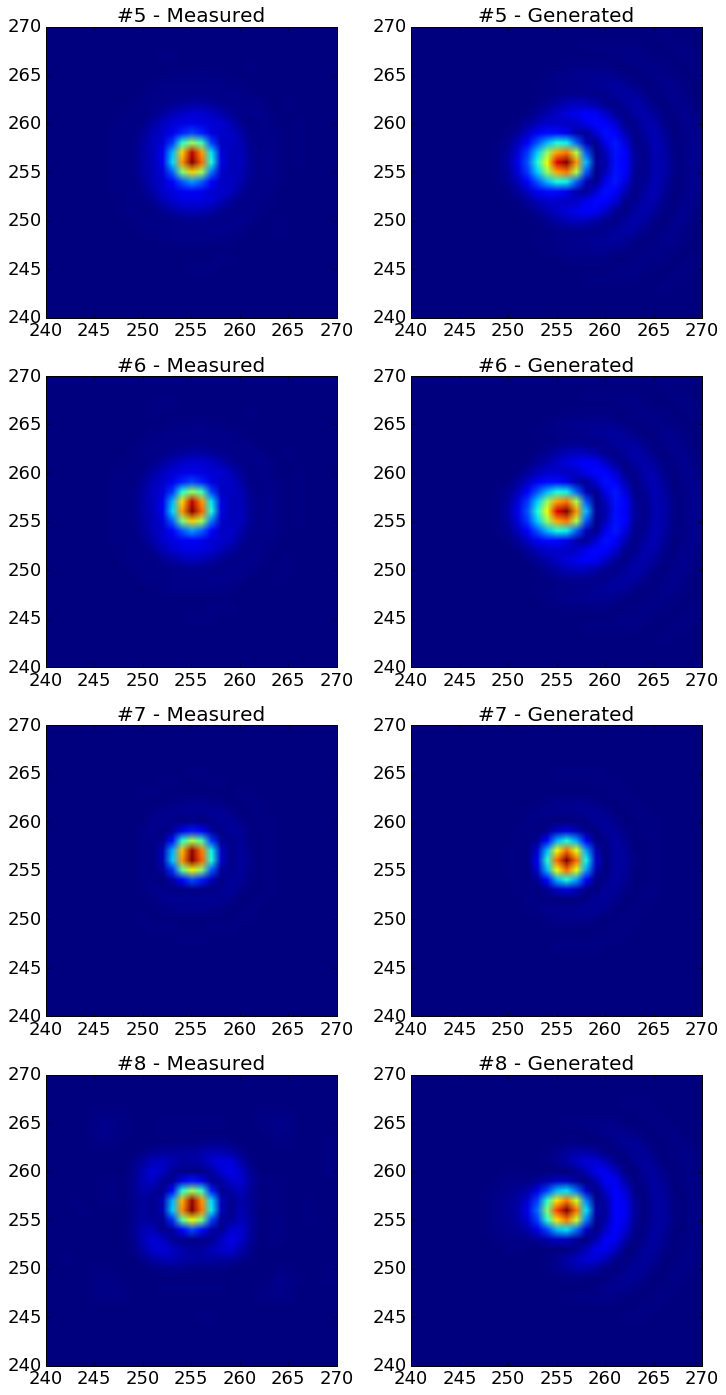

In [125]:
plt.figure(figsize=(12,24))
plt.subplot(421); plt.imshow(data_05_clp,origin='lower'); plt.title('#5 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(422); plt.imshow(d05_F,origin='lower'); plt.title('#5 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(423); plt.imshow(data_06_clp,origin='lower'); plt.title('#6 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(424); plt.imshow(d06_F,origin='lower'); plt.title('#6 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(425); plt.imshow(data_07_clp,origin='lower'); plt.title('#7 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(426); plt.imshow(d07_F,origin='lower'); plt.title('#7 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(427); plt.imshow(data_08_clp,origin='lower'); plt.title('#8 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(428); plt.imshow(d08_F,origin='lower'); plt.title('#8 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

Now, #8~#11 are labelled "H" (not "open"), which might have to do with the mismatched PSFs

(240, 270)

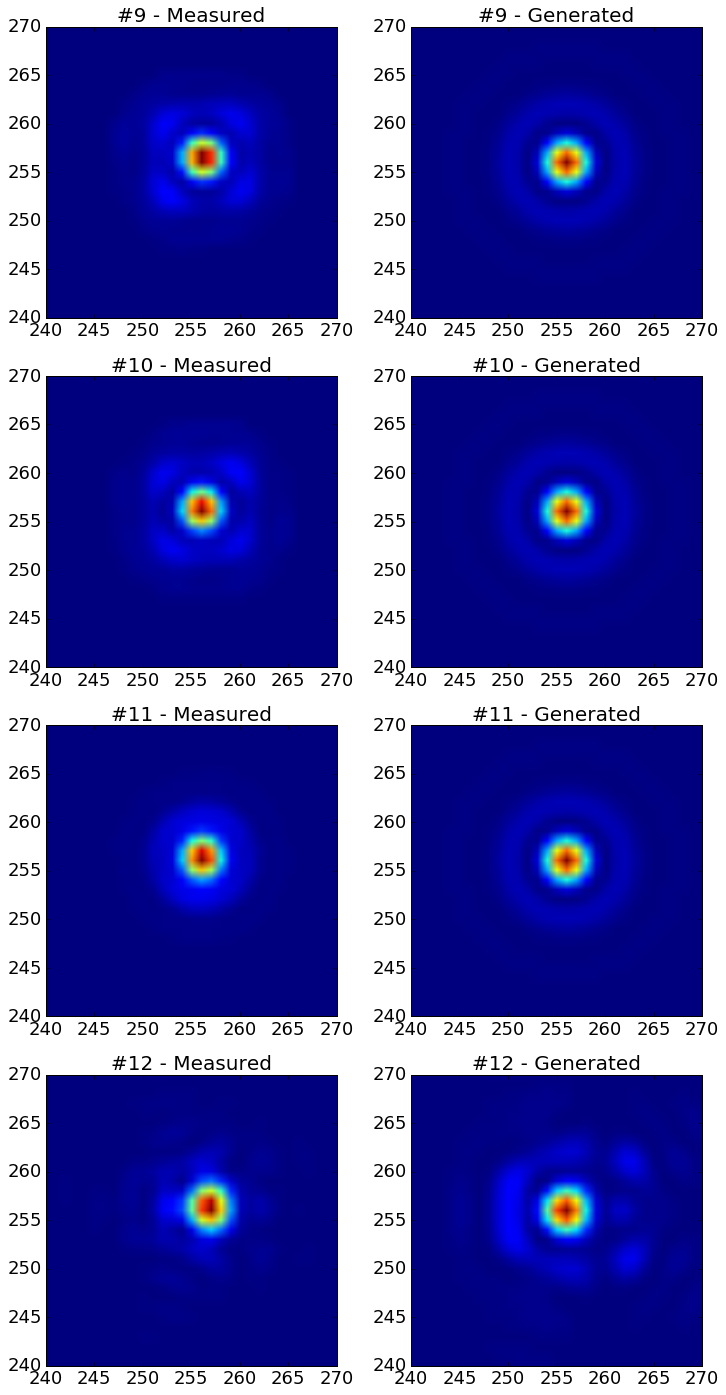

In [126]:
plt.figure(figsize=(12,24))
plt.subplot(421); plt.imshow(data_09_clp,origin='lower'); plt.title('#9 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(422); plt.imshow(d09_F,origin='lower'); plt.title('#9 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(423); plt.imshow(data_10_clp,origin='lower'); plt.title('#10 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(424); plt.imshow(d10_F,origin='lower'); plt.title('#10 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(425); plt.imshow(data_11_clp,origin='lower'); plt.title('#11 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(426); plt.imshow(d11_F,origin='lower'); plt.title('#11 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

plt.subplot(427); plt.imshow(data_12_clp,origin='lower'); plt.title('#12 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(428); plt.imshow(d12_F,origin='lower'); plt.title('#12 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

(240, 270)

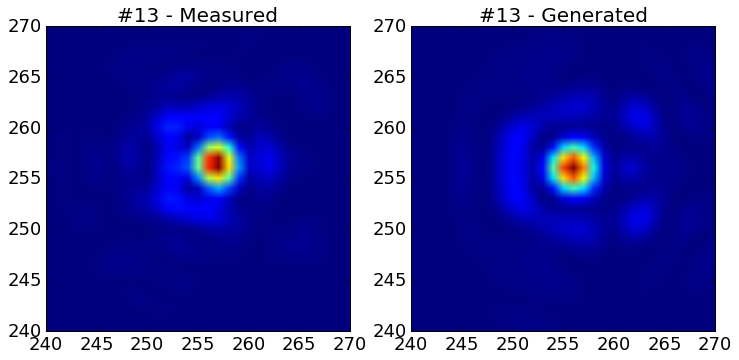

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(121); plt.imshow(data_13_clp,origin='lower'); plt.title('#13 - Measured'); plt.xlim(240,270); plt.ylim(240,270)
plt.subplot(122); plt.imshow(d13_F,origin='lower'); plt.title('#13 - Generated'); plt.xlim(240,270); plt.ylim(240,270)

_([Back to top](#Contents))_

---
## <font color="blue">PR</font>
Two sets of aperture (support): Lyot stop "`080m12_04`" or open (but as discussed, the beam size in the "open" case is ill-definied. I'll ignore this for the moment)

### Support

In [92]:
lyot = 1-fits.open('../../masks/gpi_h_lyot.fits')[0].data ## reversed
lyot_hd = fits.open('../../masks/gpi_h_lyot.fits')[0].header
print lyot_hd['OPTIC']

GPI Lyot 080m12_04


**Note:** The size of the mask array is assumed to be represent the whole plane. This may not be true depending on how the original fits was generated (padded with zeros ouside the aperture/stop or not). Fortunately we [tested](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/notebooks/PR_OSS-test.ipynb#Changing-aperture-size) that a few percent of aperture size error would not render the code useless (and actually it might have cancelled the uncertainty introduced by the oversimplified FWHM estimate)

### Setup

In [128]:
%%capture
d01_PR = PR(foc=data_01_clp,oversamp=os,support=lyot)
d02_PR = PR(foc=data_02_clp,oversamp=os,support=lyot)
d03_PR = PR(foc=data_03_clp,oversamp=os,support=lyot)
d04_PR = PR(foc=data_04_clp,oversamp=os,support=lyot)
d05_PR = PR(foc=data_05_clp,oversamp=os)
d06_PR = PR(foc=data_06_clp,oversamp=os)
d07_PR = PR(foc=data_07_clp,oversamp=os)
d08_PR = PR(foc=data_08_clp,oversamp=os,support=lyot)
d09_PR = PR(foc=data_09_clp,oversamp=os,support=lyot)
d10_PR = PR(foc=data_10_clp,oversamp=os,support=lyot)
d11_PR = PR(foc=data_11_clp,oversamp=os)
d12_PR = PR(foc=data_12_clp,oversamp=os)
d13_PR = PR(foc=data_13_clp,oversamp=os,support=lyot)

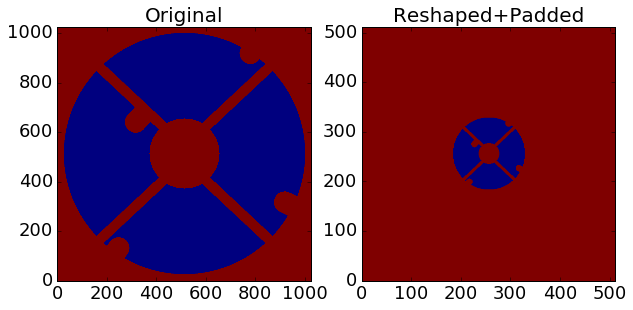

In [104]:
plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(lyot,origin='lower'); plt.title('Original')
plt.subplot(122); plt.imshow(d01_PR.support,origin='lower'); plt.title('Reshaped+Padded')

### Run

In [130]:
%%capture
d01_p,d01_f,d01_err,d01_pj,d01_errp = d01_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [131]:
%%capture
d02_p,d02_f,d02_err,d02_pj,d02_errp = d02_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [132]:
%%capture
d03_p,d03_f,d03_err,d03_pj,d03_errp = d03_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [133]:
%%capture
d04_p,d04_f,d04_err,d04_pj,d04_errp = d04_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [134]:
%%capture
d05_p,d05_f,d05_err,d05_pj,d05_errp = d05_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [135]:
%%capture
d06_p,d06_f,d06_err,d06_pj,d06_errp = d06_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [136]:
%%capture
d07_p,d07_f,d07_err,d07_pj,d07_errp = d07_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [137]:
%%capture
d08_p,d08_f,d08_err,d08_pj,d08_errp = d08_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [138]:
%%capture
d09_p,d09_f,d09_err,d09_pj,d09_errp = d09_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [139]:
%%capture
d10_p,d10_f,d10_err,d10_pj,d10_errp = d10_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [140]:
%%capture
d11_p,d11_f,d11_err,d11_pj,d11_errp = d11_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [141]:
%%capture
d12_p,d12_f,d12_err,d12_pj,d12_errp = d12_PR.OSS(beta=0.5,force_only_phase=True,init='random')

In [142]:
%%capture
d13_p,d13_f,d13_err,d13_pj,d13_errp = d13_PR.OSS(beta=0.5,force_only_phase=True,init='random')

#### Saving the results 

In [144]:
workdir = '../saves/datahandling4/'
np.save(workdir+'d01_p',d01_p); np.save(workdir+'d01_f',d01_f); np.save(workdir+'d01_err',d01_err)
np.save(workdir+'d01_pj',d01_pj); np.save(workdir+'d01_errp',d01_errp)
np.save(workdir+'d02_p',d02_p); np.save(workdir+'d02_f',d02_f); np.save(workdir+'d02_err',d02_err)
np.save(workdir+'d02_pj',d02_pj); np.save(workdir+'d02_errp',d02_errp)
np.save(workdir+'d03_p',d03_p); np.save(workdir+'d03_f',d03_f); np.save(workdir+'d03_err',d03_err)
np.save(workdir+'d03_pj',d03_pj); np.save(workdir+'d03_errp',d03_errp)
np.save(workdir+'d04_p',d04_p); np.save(workdir+'d04_f',d04_f); np.save(workdir+'d04_err',d04_err)
np.save(workdir+'d04_pj',d04_pj); np.save(workdir+'d04_errp',d04_errp)
np.save(workdir+'d05_p',d05_p); np.save(workdir+'d05_f',d05_f); np.save(workdir+'d05_err',d05_err)
np.save(workdir+'d05_pj',d05_pj); np.save(workdir+'d05_errp',d05_errp)
np.save(workdir+'d06_p',d06_p); np.save(workdir+'d06_f',d06_f); np.save(workdir+'d06_err',d06_err)
np.save(workdir+'d06_pj',d06_pj); np.save(workdir+'d06_errp',d06_errp)
np.save(workdir+'d07_p',d07_p); np.save(workdir+'d07_f',d07_f); np.save(workdir+'d07_err',d07_err)
np.save(workdir+'d07_pj',d07_pj); np.save(workdir+'d07_errp',d07_errp)
np.save(workdir+'d08_p',d08_p); np.save(workdir+'d08_f',d08_f); np.save(workdir+'d08_err',d08_err)
np.save(workdir+'d08_pj',d08_pj); np.save(workdir+'d08_errp',d08_errp)
np.save(workdir+'d09_p',d09_p); np.save(workdir+'d09_f',d09_f); np.save(workdir+'d09_err',d09_err)
np.save(workdir+'d09_pj',d09_pj); np.save(workdir+'d09_errp',d09_errp)
np.save(workdir+'d10_p',d10_p); np.save(workdir+'d10_f',d10_f); np.save(workdir+'d10_err',d10_err)
np.save(workdir+'d10_pj',d10_pj); np.save(workdir+'d10_errp',d10_errp)
np.save(workdir+'d11_p',d11_p); np.save(workdir+'d11_f',d11_f); np.save(workdir+'d11_err',d11_err)
np.save(workdir+'d11_pj',d11_pj); np.save(workdir+'d11_errp',d11_errp)
np.save(workdir+'d12_p',d12_p); np.save(workdir+'d12_f',d12_f); np.save(workdir+'d12_err',d12_err)
np.save(workdir+'d12_pj',d12_pj); np.save(workdir+'d12_errp',d12_errp)
np.save(workdir+'d13_p',d13_p); np.save(workdir+'d13_f',d13_f); np.save(workdir+'d13_err',d13_err)
np.save(workdir+'d13_pj',d13_pj); np.save(workdir+'d13_errp',d13_errp)

### Results

_([Back to top](#Contents))_

#### Reconstruction
_Note: The Zernike fitting is by default only done in the support, so the shape of support should not influence the results_

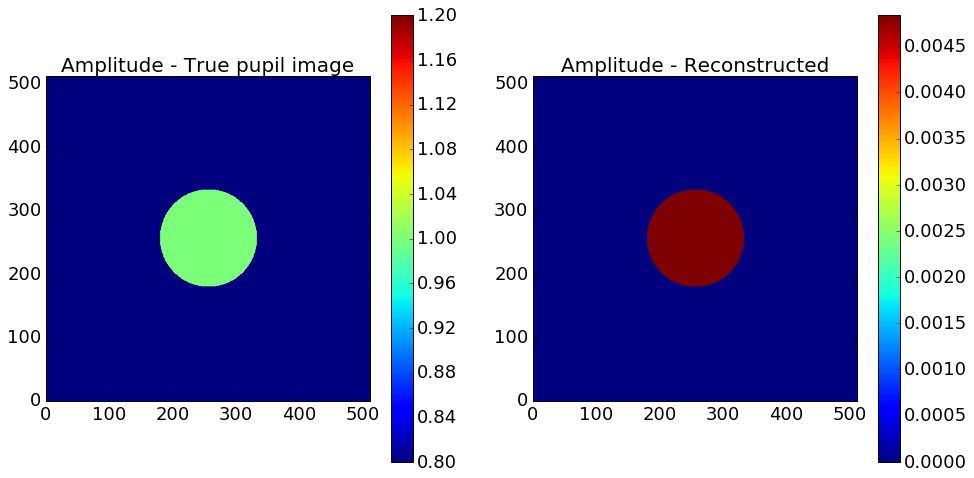

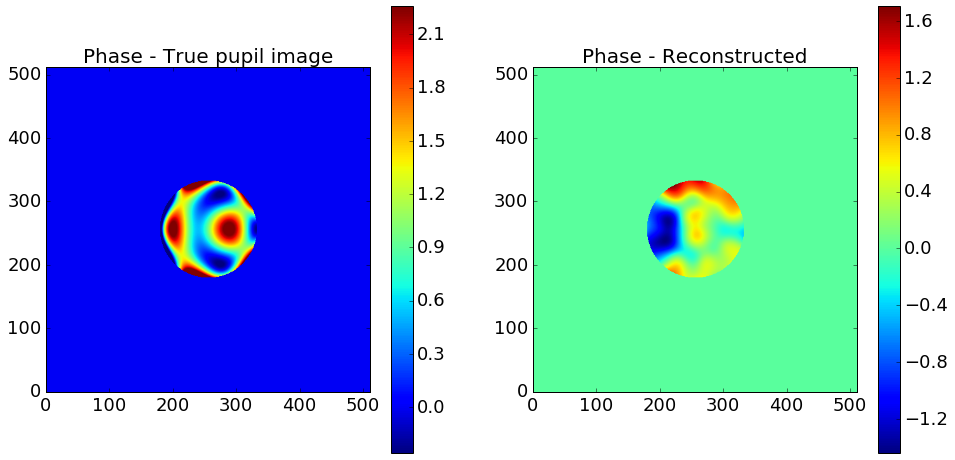

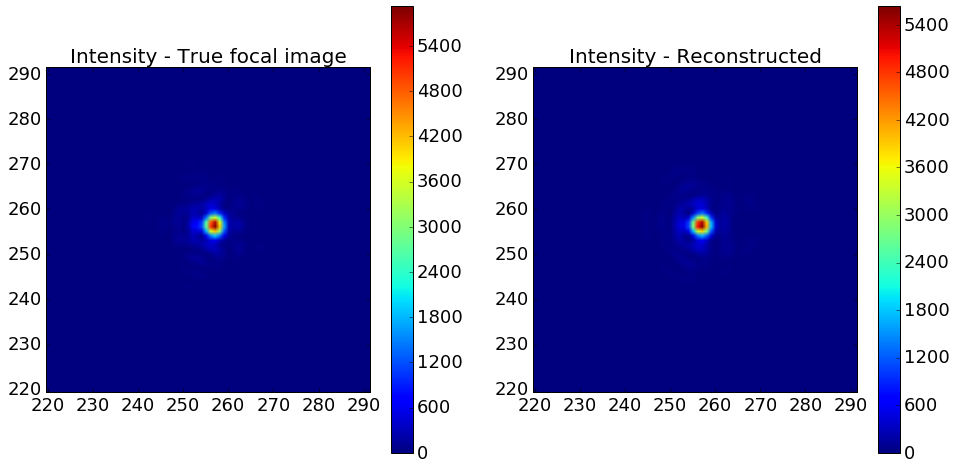

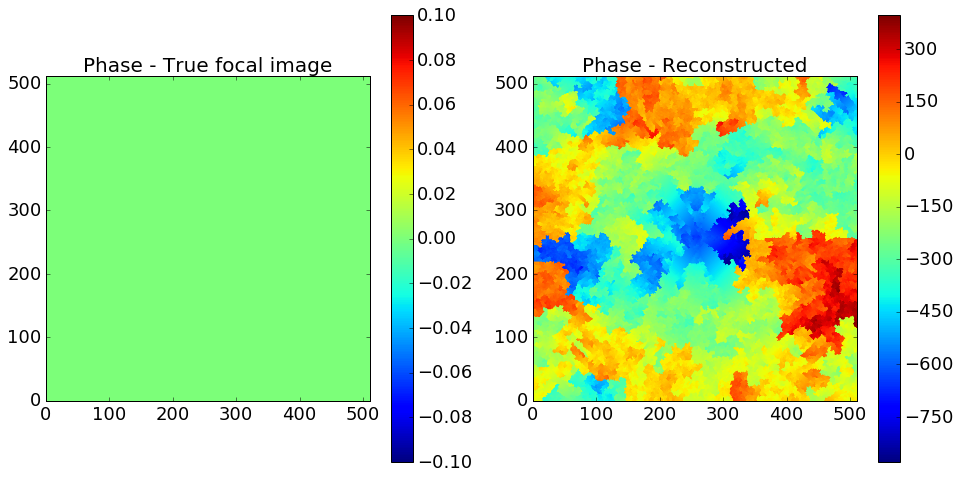

In [163]:
#plot_recon(d01_P_,np.sqrt(d01_PR.foc),d01_pj,d01_f)
#plot_recon(d02_P_,np.sqrt(d02_PR.foc),d02_pj,d02_f)
#plot_recon(d03_P_,np.sqrt(d03_PR.foc),d03_pj,d03_f)
#plot_recon(d04_P_,np.sqrt(d04_PR.foc),d04_pj,d04_f)
#plot_recon(d05_P_,np.sqrt(d05_PR.foc),d05_pj,d05_f)
#plot_recon(d06_P_,np.sqrt(d06_PR.foc),d06_pj,d06_f)
#plot_recon(d07_P_,np.sqrt(d07_PR.foc),d07_pj,d07_f)
#plot_recon(d08_P_,np.sqrt(d08_PR.foc),d08_pj,d08_f)
#plot_recon(d09_P_,np.sqrt(d09_PR.foc),d09_pj,d09_f)
#plot_recon(d10_P_,np.sqrt(d10_PR.foc),d10_pj,d10_f)
#plot_recon(d11_P_,np.sqrt(d11_PR.foc),d11_pj,d11_f)
plot_recon(d12_P_,np.sqrt(d12_PR.foc),d12_pj,d12_f)
#plot_recon(d13_P_,np.sqrt(d13_PR.foc),d13_pj,d13_f)

#### First 15 modes

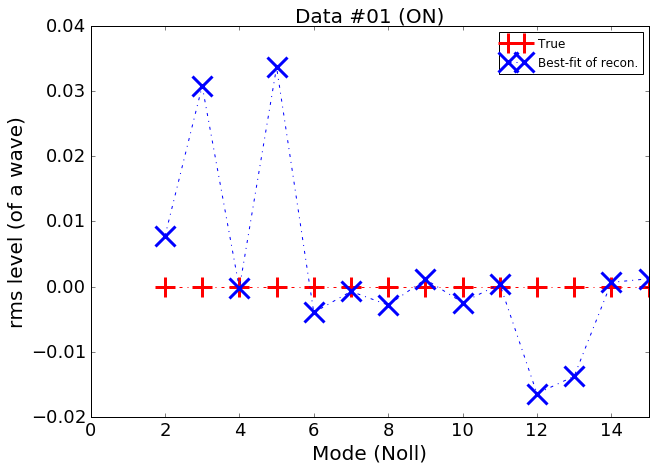

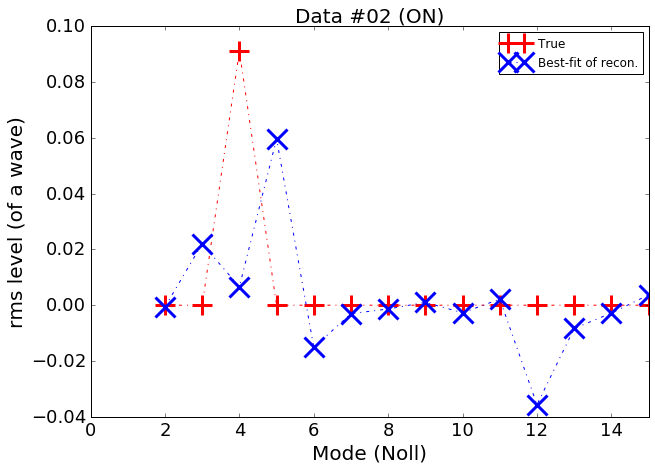

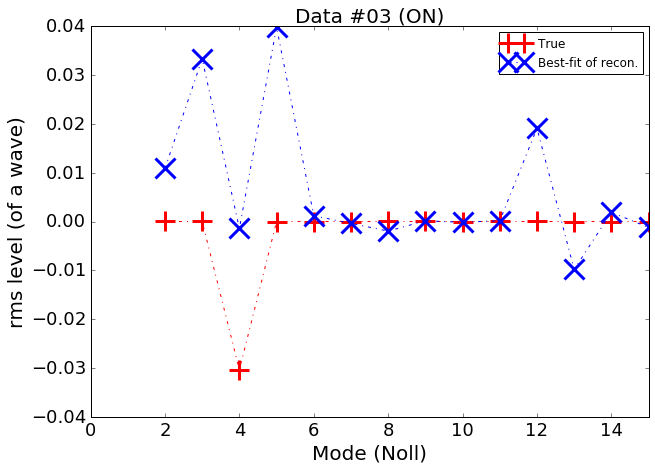

In [154]:
d01_true, d01_reco = wrap_up_zern_fit(d01_PR,Recon_phasor=d01_pj,P_phasor=d01_P_,oversamp=os2,title='Data #01 (ON)')
d02_true, d02_reco = wrap_up_zern_fit(d02_PR,Recon_phasor=d02_pj,P_phasor=d02_P_,oversamp=os2,title='Data #02 (ON)')
d03_true, d03_reco = wrap_up_zern_fit(d03_PR,Recon_phasor=d03_pj,P_phasor=d03_P_,oversamp=os2,title='Data #03 (ON)')

Well, applying Lyot stop does not seem to help disentangling the mixied "focus" and "spherical" modes... And unfortunately it brings another issue: "twisting" -- it likes very much, for some reason, #5

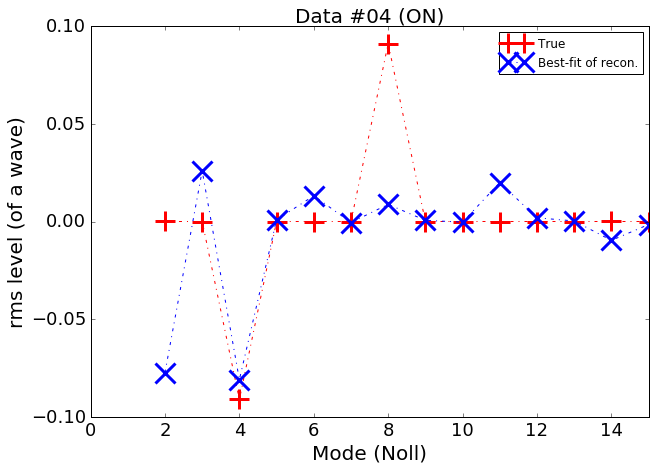

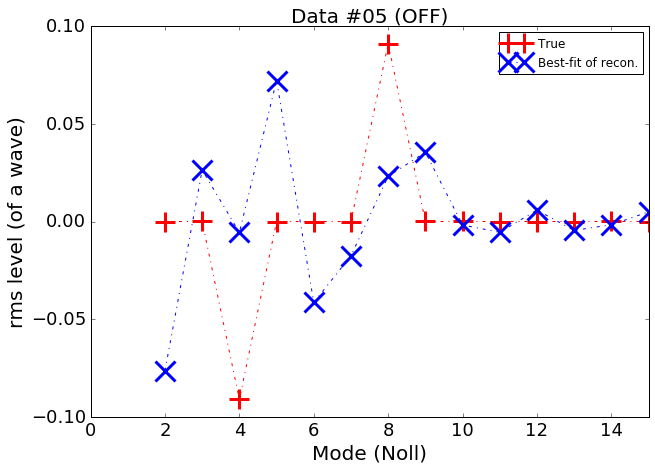

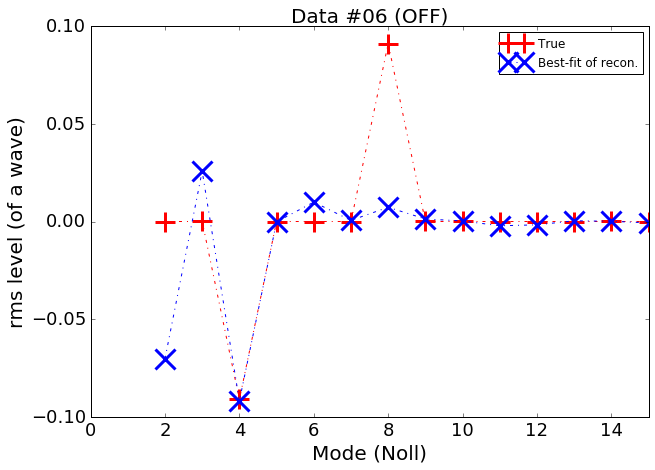

In [158]:
d04_true, d04_reco = wrap_up_zern_fit(d04_PR,Recon_phasor=d04_pj,P_phasor=d04_P_,oversamp=os2,title='Data #04 (ON)')
d05_true, d05_reco = wrap_up_zern_fit(d05_PR,Recon_phasor=d05_pj,P_phasor=d05_P_,oversamp=os2,title='Data #05 (OFF)')
d06_true, d06_reco = wrap_up_zern_fit(d06_PR,Recon_phasor=d06_pj,P_phasor=d06_P_,oversamp=os2,title='Data #06 (OFF)',flip=True)

Why is coma so hard?

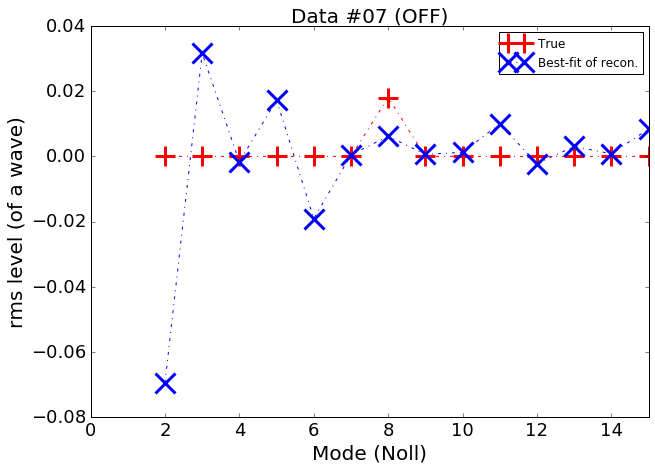

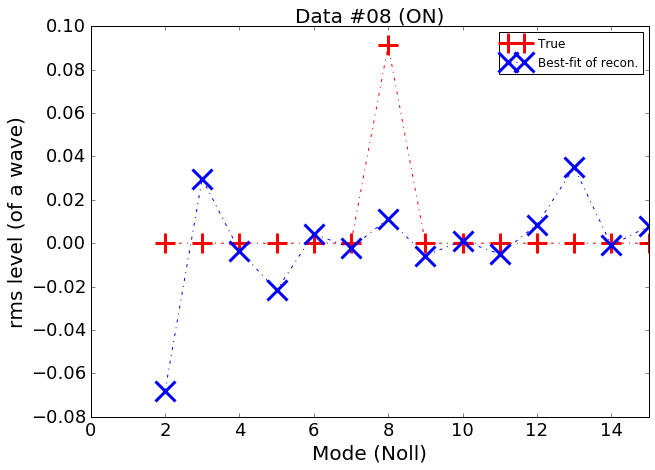

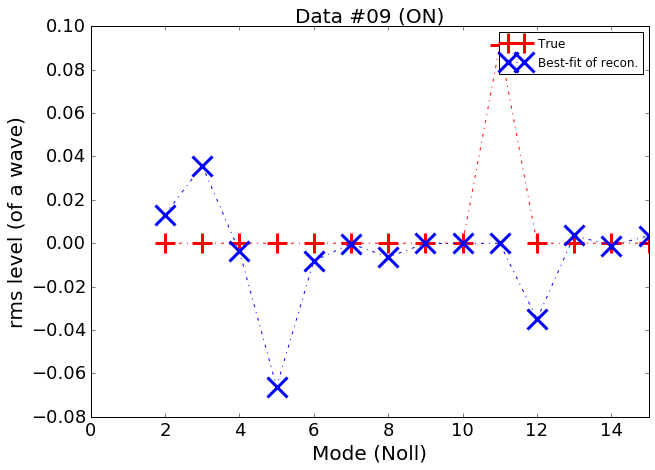

In [160]:
d07_true, d07_reco = wrap_up_zern_fit(d07_PR,Recon_phasor=d07_pj,P_phasor=d07_P_,oversamp=os2,title='Data #07 (OFF)')
d08_true, d08_reco = wrap_up_zern_fit(d08_PR,Recon_phasor=d08_pj,P_phasor=d08_P_,oversamp=os2,title='Data #08 (ON)',flip=True)
d09_true, d09_reco = wrap_up_zern_fit(d09_PR,Recon_phasor=d09_pj,P_phasor=d09_P_,oversamp=os2,title='Data #09 (ON)')

I guess it makes some sense why Lyot stop is translated to oblique astigmatism. But again, why can't coma be correctly found out? (Data #8)

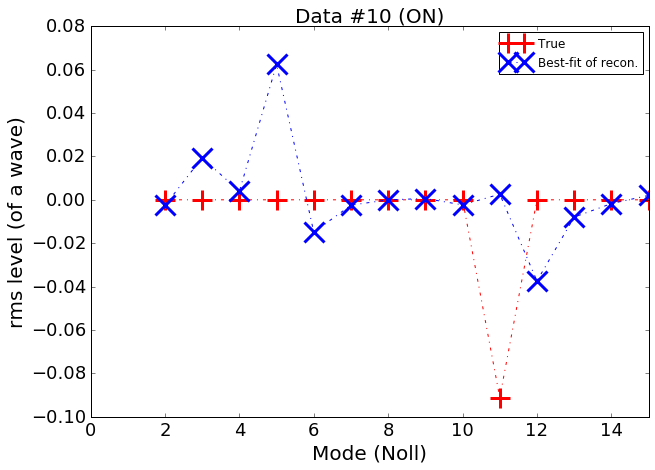

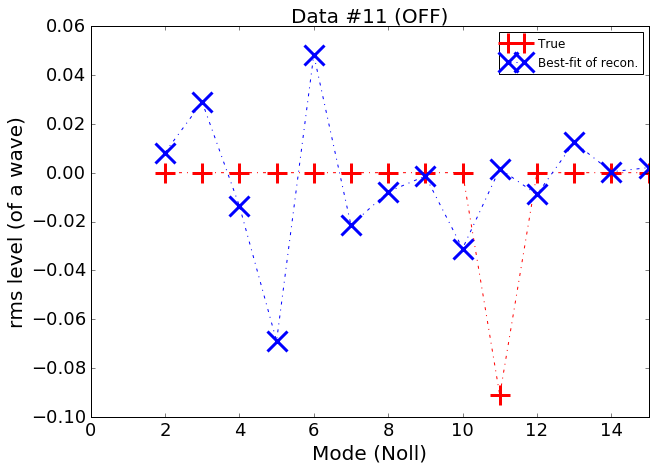

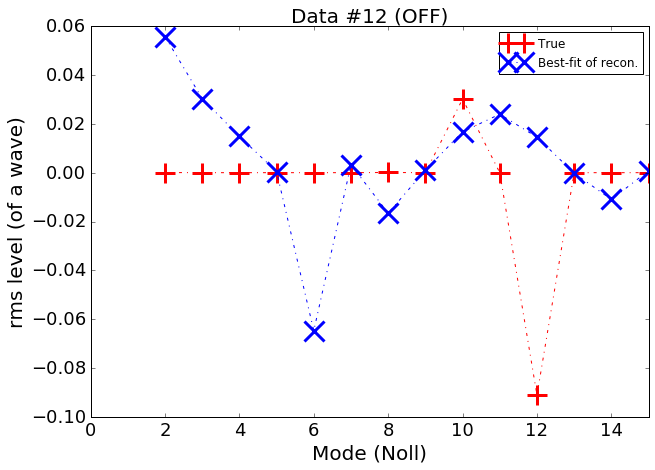

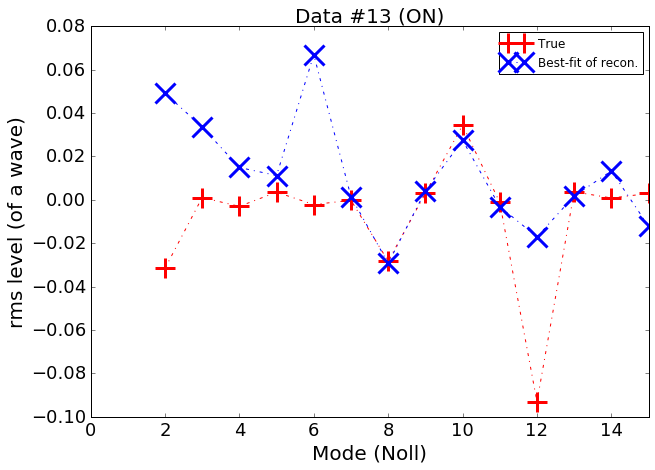

In [162]:
d10_true, d10_reco = wrap_up_zern_fit(d10_PR,Recon_phasor=d10_pj,P_phasor=d10_P_,oversamp=os2,title='Data #10 (ON)')
d11_true, d11_reco = wrap_up_zern_fit(d11_PR,Recon_phasor=d11_pj,P_phasor=d11_P_,oversamp=os2,title='Data #11 (OFF)')
d12_true, d12_reco = wrap_up_zern_fit(d12_PR,Recon_phasor=d12_pj,P_phasor=d12_P_,oversamp=os2,title='Data #12 (OFF)')
d13_true, d13_reco = wrap_up_zern_fit(d13_PR,Recon_phasor=d13_pj,P_phasor=d13_P_,oversamp=os2,title='Data #13 (ON)')

#11 is the spherical test. For the complex cases, I don't know what to say. Perhaps the higher-modes are simply difficult to find in these noisy data, and hence has been "reduced" to low-f modes like #6 - vertical astigmatism

_([Back to top](#Contents))_